# Kullback Leibler divergence

## The Kullback-Leibler divergence as a distance between theory and data

We are in a casino with two tables. There are two types of dices used in this casino: one fair (Dice of Type F), the other manipulated (Dice of Type M). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.contingency import crosstab

We plot the probabilities of outcomes of both types of dices.

In [2]:
dice = np.arange(1, 7)
dist_f = [1/6] * 6
dist_m = [1/4, 1/6, 1/12, 1/12, 1/6, 1/4]
assert np.isclose(np.sum(dist_f), 1), f"P does not sum to 1, instead {np.sum(dist_f)}"
assert np.isclose(np.sum(dist_m), 1), f"Q does not sum to 1, instead {np.sum(dist_m)}"

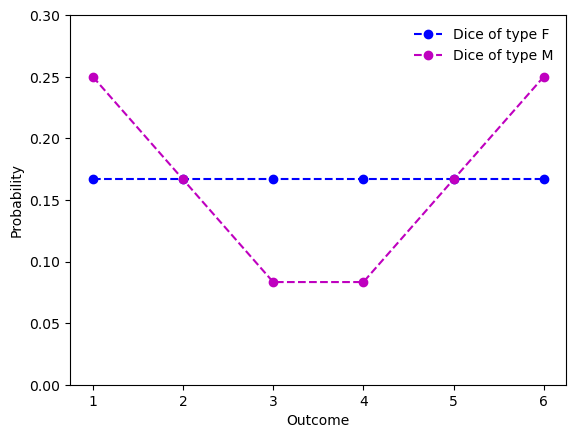

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(dice, dist_f, 'bo--', ms=6, label="Dice of type F")
ax.plot(dice, dist_m, 'mo--', ms=6, label="Dice of type M")
ax.set_ylim(bottom=0, top=0.3)
ax.set_xlabel("Outcome")
ax.set_ylabel("Probability")
ax.legend(loc='best', frameon=False)

In [4]:
def llr(p, q):
    if np.isclose(p, 0): ## if p is 0, the likelihood ratio is zero
        return(0)
    return(math.log(p) - math.log(q))

Before we throw any dice, we can think what may happen if we throw a nice and observe *any* outcome. Each time we observe an outcome, we can guess whether it is more likely to be generated by a fair or a manipulated one. To quantify our guess, we can calculate the log likelihood ratio of two hypotheses given any outcome.

In [19]:
print("Log likelihood ratios of two hypothesis (F over M) for each outcome:")
llrs = []
for outcome in range(len(dice)):
    ollr = llr(dist_f[outcome], dist_m[outcome])
    llrs.append(ollr)
    print(f"    {outcome:.3f}: {ollr:.3f}")

Log likelihood ratios of two hypothesis (F over M) for each outcome:
    0.000: -0.405
    1.000: 0.000
    2.000: 0.693
    3.000: 0.693
    4.000: 0.000
    5.000: -0.405


The log likelihood ratio quantifies how the outcome support either hypothesis. In this example, a positive log likelihood ratio means $F$ is more likely to be true given the outcome. A negative value suggests that $M$ is rather more likely to be true. A value of zero means that both hypotheses are equally likely to be true.

Next we will see that the Kullback-Leibler divergence is the expected log likelihood ratio.

In [5]:
def dice_table(outcomes):
    res = np.bincount(outcomes, minlength=7)
    res = res[1:]
    return(res)

def dice_prob(outcomes):
    dt = dice_table(outcomes)
    res = dt/len(outcomes)
    return(res)

Now we stand at the first table, throw the dice several times, and get the following outcomes.

In [6]:
table1 = [3, 1, 4, 2, 5, 6, 1, 5, 4, 1, 4, 3, 5]

In [7]:
def KL(p, q):
    assert np.isclose(np.sum(p), 1), "p does not seems to be a probability"
    assert np.isclose(np.sum(q), 1), "q does not seems to be a probability"
    llrs = [llr(x, y) for (x,y) in zip(p, q)]
    return(np.dot(p, llrs))

We can calculate the empirical probability of observing each outcome.

In [8]:
table1_prob = dice_prob(table1)
print(table1_prob)

[0.23076923 0.07692308 0.15384615 0.23076923 0.23076923 0.07692308]


In [9]:
KL_T1_F = KL(table1_prob, dist_f)
KL_T1_M = KL(table1_prob, dist_m)

In [10]:
print(f"The *relative entropy* of observed data and hypothesis F is {KL_T1_F:.3f}")
print(f"The *Kullback-Leibler divergence* of observed data and hypothesis M is {KL_T1_M:.3f}")

The *relative entropy* of observed data and hypothesis F is 0.094
The *Kullback-Leibler divergence* of observed data and hypothesis M is 0.236


In our example, the Kullback-Leibler divergence quantifies how surprising the observed data is for a hypothesis. The larger the divergence, the more surprising the data is for the model. When we compare two models that are similarly complex, the one associated with less surprise, i.e. the one has smaller KL divergence, is more likely to be true. In this case, we tend to prefer the hypothesis that the dice used on Table 1 is fair.

Let's throw the dice on table 2 for a few times.

In [11]:
table2 = [6, 1, 3, 6, 2, 5, 4, 1, 1, 2]
table2_prob = dice_prob(table2)
print(table2_prob)

[0.3 0.2 0.1 0.1 0.1 0.2]


In [12]:
KL_T2_F = KL(table2_prob, dist_f)
KL_T2_M = KL(table2_prob, dist_m)
print(f"The *relative entropy* of the table 2 data and hypothesis F is {KL_T2_F:.3f}")
print(f"The *Kullback-Leibler divergence* of the table 2 data and hypothesis M is {KL_T2_M:.3f}")

The *relative entropy* of the table 2 data and hypothesis F is 0.096
The *Kullback-Leibler divergence* of the table 2 data and hypothesis M is 0.032


For table 2, we tend to believe that the dice is likely manipulated.

Finally we plot the two hypotheses and observations from the two tables. Visually it becomes clear that data from the two tables are likely generated by distinct mechanisms.

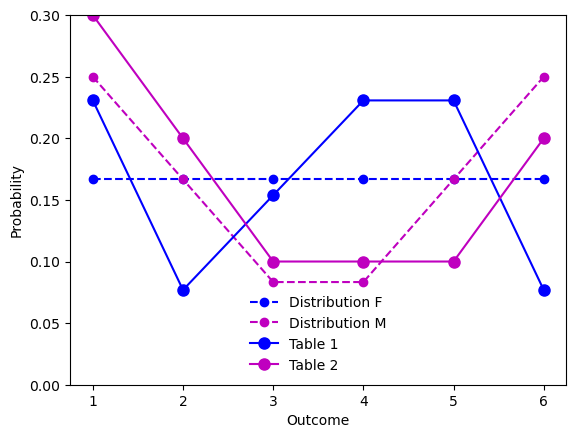

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(dice, dist_f, 'bo--', ms=6, label="Distribution F")
ax.plot(dice, dist_m, 'mo--', ms=6, label="Distribution M")
ax.plot(dice, table1_prob, 'bo-', ms=8, label="Table 1")
ax.plot(dice, table2_prob, 'mo-', ms=8, label="Table 2")
ax.set_ylim(bottom=0, top=0.3)
ax.set_xlabel("Outcome")
ax.set_ylabel("Probability")
ax.legend(loc='best', frameon=False)

What would happen if we swap the position of T1 (or T2) and that of F (or M)? It turns out that the KL divergence is not symmetric, yet we reach the same conclusion.

In [14]:
KL_T1_F = KL(table1_prob, dist_f)
KL_F_T1 = KL(dist_f, table1_prob)
KL_T1_M = KL(table1_prob, dist_m)
KL_M_T1 = KL(dist_m, table1_prob)
print(f"KL(T1 || F) = {KL_T1_F:.3f}")
print(f"KL(T1 || M) = {KL_T1_M:.3f}")
print(f"KL(F || T1) = {KL_F_T1:.3f}")
print(f"KL(M || T1) = {KL_M_T1:.3f}")

KL(T1 || F) = 0.094
KL(T1 || M) = 0.236
KL(F || T1) = 0.108
KL(M || T1) = 0.253


## The Kullback-Leibler divergence as a distance between any two distributions

We can calculate Kullback-Leibler divergence for any two distributions.

In [16]:
KL(dist_f, dist_m)

0.09589402415059367

In [17]:
KL(dist_m, dist_f)

0.08720802396075797

Suppose we now introduce the third type of dice with lead. We can see that it has a larger divergence with regard to the fair dice than the manipulated one, which means that it is further from being fair than the manipulated one.

In [18]:
dist_l = [0, 0, 0, 0, 0, 1]
print(KL(dist_l, dist_f))
print(KL(dist_m, dist_f))

1.791759469228055
0.08720802396075797
